# INTRODUCTION

Nous allons dans ce notebook tenter de detecter si un patient peut etre atteint de maladie cardiaque ou pas. Pour cela nous allons utiliser 4 algorithmes (Regression Logistic, RandomForest, SVC et KNN) ainsi qu'un perceptron et les comparer afin d'obtenir le meilleur modele

# LIBRAIRIES

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn.model_selection import cross_val_score, train_test_split
import scipy.stats as ss
from sklearn import feature_selection as fs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# DATASET

In [2]:
mc= pd.read_csv('heart-disease-uci/heart_statlog_cleveland_hungary_final.csv')
mc.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
cols = mc.columns.to_list()
cols

['age',
 'sex',
 'chest pain type',
 'resting bp s',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope',
 'target']

In [5]:
cols = ['age',
         'resting bp s',
        'cholesterol',
         'max heart rate',
         'oldpeak',
         'sex',
        'chest pain type',       
         'fasting blood sugar',
         'resting ecg',
         'exercise angina',
        'ST slope',
         'target']
mc = mc[cols]
mc.head()

,age,resting bp s,cholesterol,max heart rate,oldpeak,sex,chest pain type,fasting blood sugar,resting ecg,exercise angina,ST slope,target
0,40,140,289,172,0.0,1,2,0,0,0,1,0
1,49,160,180,156,1.0,0,3,0,0,0,2,1
2,37,130,283,98,0.0,1,2,0,1,0,1,0
3,48,138,214,108,1.5,0,4,0,0,1,2,1
4,54,150,195,122,0.0,1,3,0,0,0,1,0


3 age: age in years
4 sex: sex (1 = male; 0 = female)
9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
10 trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
12 chol: serum cholestoral in mg/dl
16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
32 thalach: maximum heart rate achieved
38 exang: exercise induced angina (1 = yes; 0 = no)
40 oldpeak = ST depression induced by exercise relative to rest
41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
44 ca: number of major vessels (0-3) colored by flourosopy
51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

L'angine de poitrine Écouter, ou angor (en latin : angina pectoris ou angor pectoris, « constriction de la poitrine »), est un symptôme cardiaque caractérisant la maladie coronarienne et se manifestant par une douleur thoracique résultant d'un manque d'apport d'oxygène au myocarde, le plus souvent consécutive à une diminution du débit sanguin dans une artère coronaire (on parle de sténose coronarienne). Ce manque d'oxygène au niveau du cœur est appelé ischémie du myocarde. L'angine de poitrine est un symptôme commun mais inconstant de l'ischémie du myocarde : cette douleur survient typiquement lors d'un effort et cesse à l'arrêt de ce dernier. C'est ce qui peut aider à distinguer l'angine des autres types de douleurs thoraciques. 

In electrocardiography, the ST segment connects the QRS complex and the T wave and has a duration of 0.005 to 0.150 sec (5 to 150 ms).

It starts at the J point (junction between the QRS complex and ST segment) and ends at the beginning of the T wave. However, since it is usually difficult to determine exactly where the ST segment ends and the T wave begins, the relationship between the ST segment and T wave should be examined together. The typical ST segment duration is usually around 0.08 sec (80 ms). It should be essentially level with the PR and TP segments.

The ST segment represents the isoelectric period when the ventricles are in between depolarization and repolarization.
Interpretation

    The normal ST segment has a slight upward concavity.
    Flat, downsloping, or depressed ST segments may indicate coronary ischemia.
    ST elevation may indicate transmural myocardial infarction. An elevation of >1mm and longer than 80 milliseconds following the J-point. This measure has a false positive rate of 15-20% (which is slightly higher in women than men) and a false negative rate of 20-30%.[1]
    ST depression may be associated with subendocardial myocardial infarction, hypokalemia, or digitalis toxicity.[2]

In [4]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
mc.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [6]:
mc.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [7]:
mc.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [6]:
mc.target.value_counts()

1    629
0    561
Name: target, dtype: int64

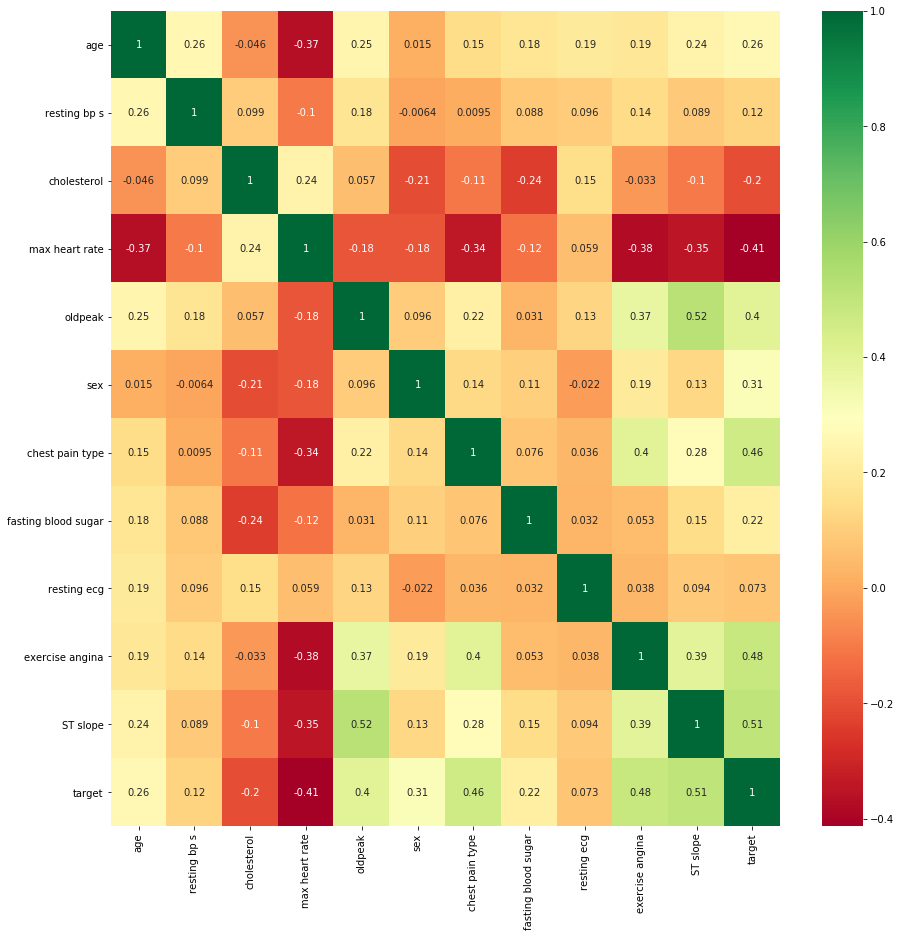

In [7]:
#Matrice de correlation
plt.figure(figsize=(15,15))
hm= sns.heatmap(mc.corr(), annot= True, cmap= "RdYlGn")

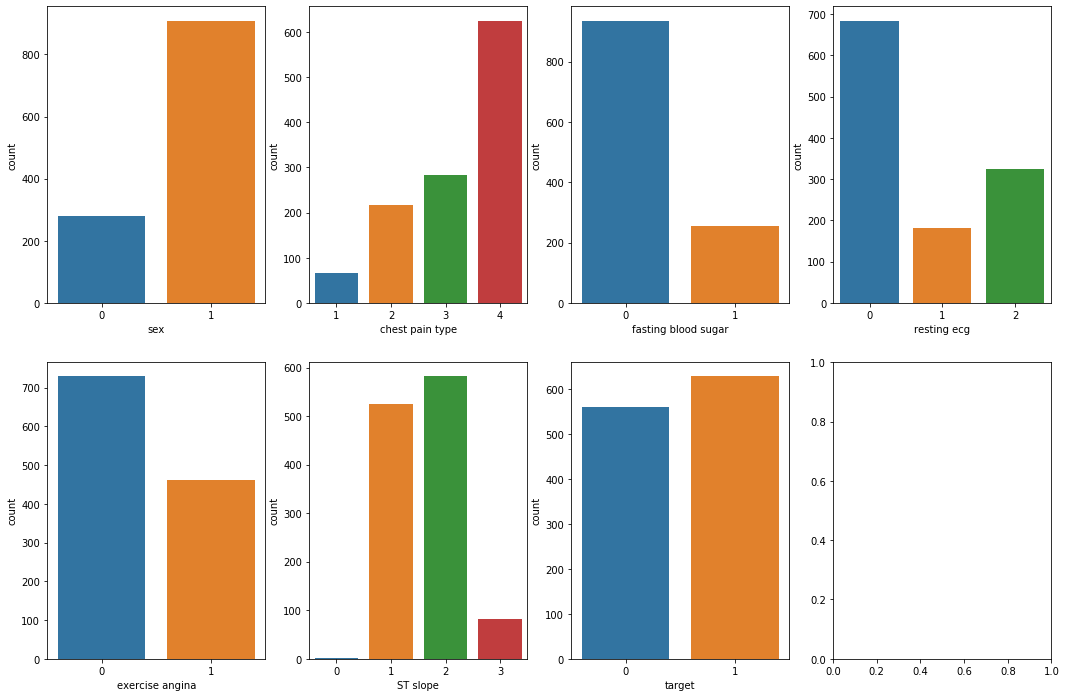

In [6]:
#Effectifs pour chaque categorie
categories = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg',
       'exercise angina', 'ST slope', 'target']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 12))
for col, ax in zip(categories, axs.ravel()):
    sns.countplot(x=col, data=mc, ax=ax)

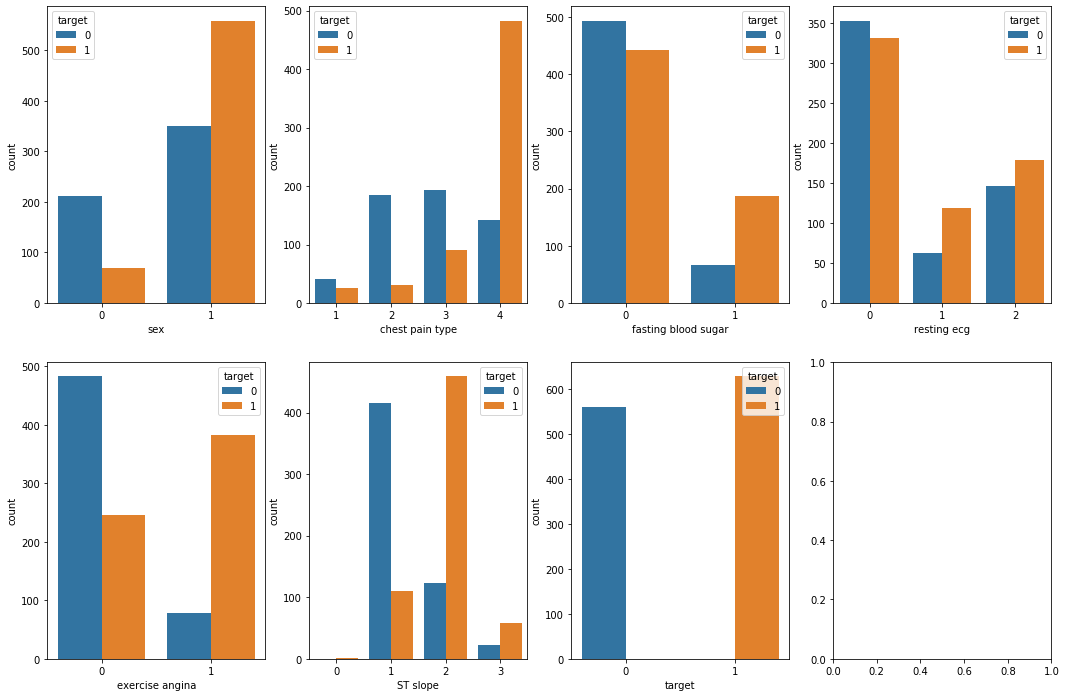

In [7]:
#Effectifs pour chaque categorie selon la target
categories = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg',
       'exercise angina', 'ST slope', 'target']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 12))
for col, ax in zip(categories, axs.ravel()):
    sns.countplot(x=col, data=mc, ax=ax, hue='target')

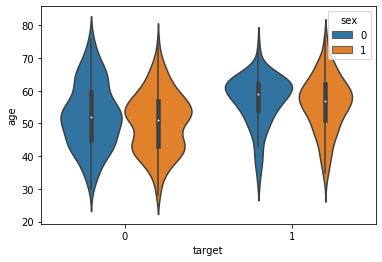

In [8]:
sns.violinplot(x='target', y='age', hue='sex',data=mc)

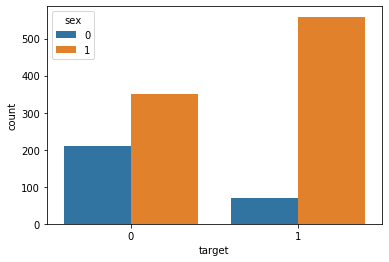

In [9]:
sns.countplot(x='target', hue='sex', data=mc)

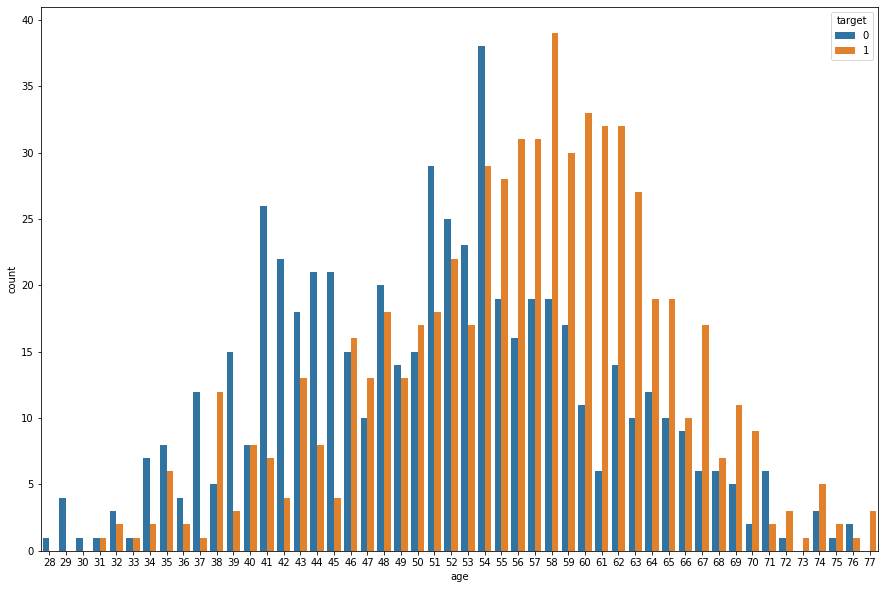

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(x='age', hue='target', data=mc)

# FEATURE ENGINEERING

In [8]:
Label = np.array(mc['target'])
Features= np.array(mc.drop(['target'], axis=1))
Features.shape

(1190, 11)

In [9]:
#mc.to_csv('final.csv', index=False)

In [10]:
Features

array([[ 40., 140., 289., ...,   0.,   0.,   1.],
       [ 49., 160., 180., ...,   0.,   0.,   2.],
       [ 37., 130., 283., ...,   1.,   0.,   1.],
       ...,
       [ 57., 130., 131., ...,   0.,   1.,   2.],
       [ 57., 130., 236., ...,   2.,   0.,   2.],
       [ 38., 138., 175., ...,   0.,   0.,   1.]])

In [11]:
#Normalisation
scaler = preprocessing.StandardScaler()
scaler.fit(Features[:,:5])
Features[:, :5] = scaler.transform(Features[:, :5])
Features

array([[-1.46672783,  0.42732826,  0.7756736 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.50460037,  1.51658739, -0.29951178, ...,  0.        ,
         0.        ,  2.        ],
       [-1.78743698, -0.11730131,  0.71648908, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.35062404, -0.11730131, -0.782852  , ...,  0.        ,
         1.        ,  2.        ],
       [ 0.35062404, -0.11730131,  0.25287704, ...,  2.        ,
         0.        ,  2.        ],
       [-1.68053393,  0.31840234, -0.34883221, ...,  0.        ,
         0.        ,  1.        ]])

In [12]:
print(Features.shape)

## Definir le threshold de la variance et l'appliquer aux Features. 
sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
Features_reduced = sel.fit_transform(Features)

## Afficher le support et le format des Features
print(sel.get_support())
print(Features_reduced.shape)

(1190, 11)
[ True  True  True  True  True  True  True  True  True  True  True]
(1190, 11)


In [13]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features_reduced, Label, test_size= 0.2, random_state=42)

# MODELES

## REGRESSION LOGISTIQUE

In [14]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred_lr = clf_lr.predict(X_test)

In [16]:
cm_lr = sklm.confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[ 90,  17],
       [ 16, 115]], dtype=int64)

In [17]:
score_lr= sklm.classification_report(y_test, y_pred_lr)
print(score_lr)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



In [18]:
print('Accuracy du test set pour lr = {}'.format((cm_lr[0][0] + cm_lr[1][1])/len(y_test)))

Accuracy du test set pour lr = 0.8613445378151261


## SVC

In [19]:
clf_svc= SVC(kernel='linear')
clf_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
y_pred_svc= clf_svc.predict(X_test)
cm_svc = sklm.confusion_matrix(y_test, y_pred_svc)
cm_svc

array([[ 88,  19],
       [ 18, 113]], dtype=int64)

In [21]:
score_svc= sklm.classification_report(y_test, y_pred_svc)
print(score_svc)
print('Accuracy du test set pour svc = {}'.format((cm_svc[0][0] + cm_svc[1][1])/len(y_test)))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       107
           1       0.86      0.86      0.86       131

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238

Accuracy du test set pour svc = 0.8445378151260504


In [22]:
clf_ksvc= SVC(kernel='rbf')
clf_ksvc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
y_pred_ksvc= clf_ksvc.predict(X_test)
cm_ksvc = sklm.confusion_matrix(y_test, y_pred_ksvc)
cm_ksvc

array([[ 90,  17],
       [ 12, 119]], dtype=int64)

In [24]:
score_ksvc= sklm.classification_report(y_test, y_pred_ksvc)
print(score_ksvc)
print('Accuracy du test set pour ksvc = {}'.format((cm_ksvc[0][0] + cm_ksvc[1][1])/len(y_test)))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       107
           1       0.88      0.91      0.89       131

    accuracy                           0.88       238
   macro avg       0.88      0.87      0.88       238
weighted avg       0.88      0.88      0.88       238

Accuracy du test set pour ksvc = 0.8781512605042017


## RANDOM FOREST

In [25]:
clf_rf= RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [26]:
y_pred_rf= clf_rf.predict(X_test)
cm_rf = sklm.confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[100,   7],
       [  5, 126]], dtype=int64)

In [27]:
score_rf= sklm.classification_report(y_test, y_pred_rf)
print(score_rf)
print('Accuracy du test set pour rf = {}'.format((cm_rf[0][0] + cm_rf[1][1])/len(y_test)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.95      0.96      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238

Accuracy du test set pour rf = 0.9495798319327731


## KNN

In [28]:
clf_knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
y_pred_knn= clf_knn.predict(X_test)
cm_knn = sklm.confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[ 89,  18],
       [ 16, 115]], dtype=int64)

In [30]:
score_knn= sklm.classification_report(y_test, y_pred_knn)
print(score_knn)
print('Accuracy du test set pour knn = {}'.format((cm_knn[0][0] + cm_knn[1][1])/len(y_test)))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       107
           1       0.86      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.85      0.86       238
weighted avg       0.86      0.86      0.86       238

Accuracy du test set pour knn = 0.8571428571428571


In [31]:
knn_classifier= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [32]:
y_pred_best_knn= knn_classifier.predict(X_test)
cm_best_knn = sklm.confusion_matrix(y_test, y_pred_best_knn)
cm_best_knn

array([[ 91,  16],
       [ 18, 113]], dtype=int64)

In [33]:
score_best_knn= sklm.classification_report(y_test, y_pred_best_knn)
print(score_best_knn)
print('Accuracy du test set pour best_knn = {}'.format((cm_best_knn[0][0] + cm_best_knn[1][1])/len(y_test)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       107
           1       0.88      0.86      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238

Accuracy du test set pour best_knn = 0.8571428571428571


## ANN

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [36]:
ann= Sequential()
ann.add(Dense(6, kernel_initializer='uniform', activation='relu', input_dim=11))
ann.add(Dense(6, kernel_initializer='uniform', activation='relu'))
ann.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
epoch_hist= ann.fit(X_train, y_train, batch_size=32, nb_epoch=100, validation_split= 0.2)

C:\Users\tripl\anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 761 samples, validate on 191 samples
Epoch 1/100
761/761 [==============================] - 0s 386us/step - loss: 0.6927 - accuracy: 0.5230 - val_loss: 0.6925 - val_accuracy: 0.4764
Epoch 2/100
761/761 [==============================] - 0s 55us/step - loss: 0.6898 - accuracy: 0.5348 - val_loss: 0.6894 - val_accuracy: 0.4764
Epoch 3/100
761/761 [==============================] - 0s 59us/step - loss: 0.6804 - accuracy: 0.5348 - val_loss: 0.6804 - val_accuracy: 0.4764
Epoch 4/100
761/761 [==============================] - 0s 51us/step - loss: 0.6596 - accuracy: 0.5348 - val_loss: 0.6639 - val_accuracy: 0.4764
Epoch 5/100
761/761 [==============================] - 0s 41us/step - loss: 0.6310 - accuracy: 0.5348 - val_loss: 0.6455 - val_accuracy: 0.4764
Epoch 6/100
761/761 [==============================] - 0s 42us/step - loss: 0.6013 - accuracy: 0.5966 - val_loss: 0.6294 - val_accuracy: 0.6178
Epoch 7/100
761/761 [==============================] - 0s 42us/step - loss: 0.5807 - acc

Epoch 56/100
761/761 [==============================] - 0s 41us/step - loss: 0.4377 - accuracy: 0.8318 - val_loss: 0.4925 - val_accuracy: 0.7853
Epoch 57/100
761/761 [==============================] - 0s 37us/step - loss: 0.4371 - accuracy: 0.8279 - val_loss: 0.4915 - val_accuracy: 0.7906
Epoch 58/100
761/761 [==============================] - 0s 37us/step - loss: 0.4359 - accuracy: 0.8279 - val_loss: 0.4930 - val_accuracy: 0.8063
Epoch 59/100
761/761 [==============================] - 0s 37us/step - loss: 0.4350 - accuracy: 0.8279 - val_loss: 0.4900 - val_accuracy: 0.8010
Epoch 60/100
761/761 [==============================] - 0s 35us/step - loss: 0.4338 - accuracy: 0.8305 - val_loss: 0.4892 - val_accuracy: 0.8063
Epoch 61/100
761/761 [==============================] - 0s 36us/step - loss: 0.4326 - accuracy: 0.8318 - val_loss: 0.4877 - val_accuracy: 0.8063
Epoch 62/100
761/761 [==============================] - 0s 40us/step - loss: 0.4319 - accuracy: 0.8305 - val_loss: 0.4866 - val_ac

In [37]:
y_pred_ann= ann.predict(X_test)
y_pred_ann = (y_pred_ann> 0.5)
cm_ann = sklm.confusion_matrix(y_test, y_pred_ann)
cm_ann

array([[ 88,  19],
       [ 15, 116]], dtype=int64)

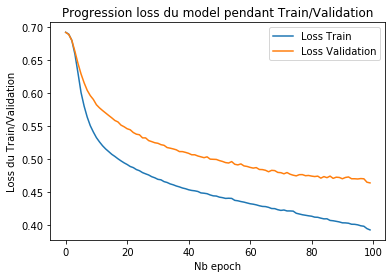

In [38]:
import matplotlib.pyplot as plt
plt.plot(epoch_hist.history['loss'])
plt.plot(epoch_hist.history['val_loss'])
plt.title('Progression loss du model pendant Train/Validation')
plt.ylabel('Loss du Train/Validation')
plt.xlabel('Nb epoch')
plt.legend(['Loss Train', 'Loss Validation'])

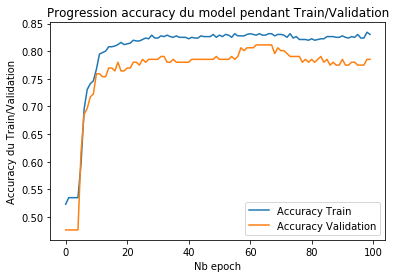

In [39]:
plt.plot(epoch_hist.history['accuracy'])
plt.plot(epoch_hist.history['val_accuracy'])
plt.title('Progression accuracy du model pendant Train/Validation')
plt.ylabel('Accuracy du Train/Validation')
plt.xlabel('Nb epoch')
plt.legend(['Accuracy Train', 'Accuracy Validation'])

In [ ]:
# Le modele du Random Forest est le meilleur